# Simplest Working Tensorflow Notebook Ever


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

### Generating data with numpy

In [45]:
# The true value of the coefficients, which we will estimate hereafter
a_true, b_true = 1.3, -0.7

In [11]:
n_sample = 1000

Let's  generate the samples

$ y_i = a x_i + b + \epsilon_i $

Where $\epsilon_i \sim \mathcal{N}(0,\sigma^2)$ with $\sigma = 0.1$

In [46]:
# Generate some abscissa
x = np.random.rand(n_sample)

In [47]:
# Generate the corresponding ordinate
y = a_true * x + b_true + np.random.randn(n_sample) * 0.1

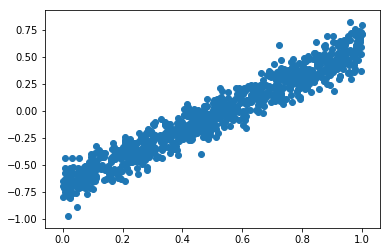

In [31]:
plt.scatter(x,y)

### Finding the coefficients a and b that minimize the sum of the square errors

#####  Random initialization of the variables to estimate

In [32]:
a_estimated = tf.Variable(tf.truncated_normal([1]))
b_estimated = tf.Variable(tf.truncated_normal([1]))

##### Designing a loss function to minimize the sum of the square error

In [33]:
loss = 0.0

In [34]:
for i_sample in range(n_sample):
    loss += tf.square(a_estimated * x[i_sample] + b_estimated - y[i_sample])

In [35]:
train_op = tf.train.AdamOptimizer(learning_rate=0.1, epsilon=0.1).minimize(loss)

##### Initialization of TensorFlow

In [39]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

#### Gradient descent steps to optimize the value of `a_estimated` and `b_estimated`

In [40]:
n_iter = 100
loss_list = []

In [41]:
for i in range(n_iter):
    sess.run(train_op)
    loss_list.append(sess.run(loss))

#### Showing the losses for each iteration

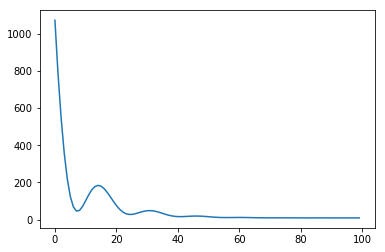

In [42]:
plt.plot(loss_list)

##### And finally, let's see what are the estimated values

In [48]:
sess.run([a_estimated, b_estimated])

[array([ 1.28168952], dtype=float32), array([-0.68814737], dtype=float32)]

##### The true values are

In [49]:
a_true, b_true

(1.3, -0.7)

### The values are close ! Great job.